In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sn #biblioteca python construida sobre o matplotlib que facilita a criação de gráficos mais elaborados e bonitos. 
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#Pandas é usado para manipular dados tabulares (linhs, colunas) a partir de datasets. Permite fazer filtragem, agregacao, e manipulacao de dados. 
#Kaggle

In [22]:
#realizando a leitura de um dataset
data = pd.read_csv("archive/Melbourne_housing_FULL.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
mean_price = data["Price"].mean()
data["Price"] = data["Price"].fillna(mean_price)

bedroom2_mean = data["Bedroom2"].mean()
data["Bedroom2"] = data["Bedroom2"].fillna(bedroom2_mean)

bathroom_mean = data["Bathroom"].mean()
data["Bathroom"] = data["Bathroom"].fillna(bathroom_mean)

In [10]:
#criando uma nova coluna com total de meses baseados na data
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True, errors="coerce")
data["TotalMonths"] = (data["Date"].dt.year * 12 + data["Date"].dt.month).astype("int64")
data = data.drop(["Address", "Method", "Suburb", "Date", "SellerG", "CouncilArea", "Regionname", "Type", "Lattitude", "Longtitude", "Car", "Landsize", "BuildingArea", "YearBuilt"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34857 non-null  int64  
 1   Price          34857 non-null  float64
 2   Distance       34856 non-null  float64
 3   Postcode       34856 non-null  float64
 4   Bedroom2       34857 non-null  float64
 5   Bathroom       34857 non-null  float64
 6   Propertycount  34854 non-null  float64
 7   TotalMonths    34857 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 2.1 MB


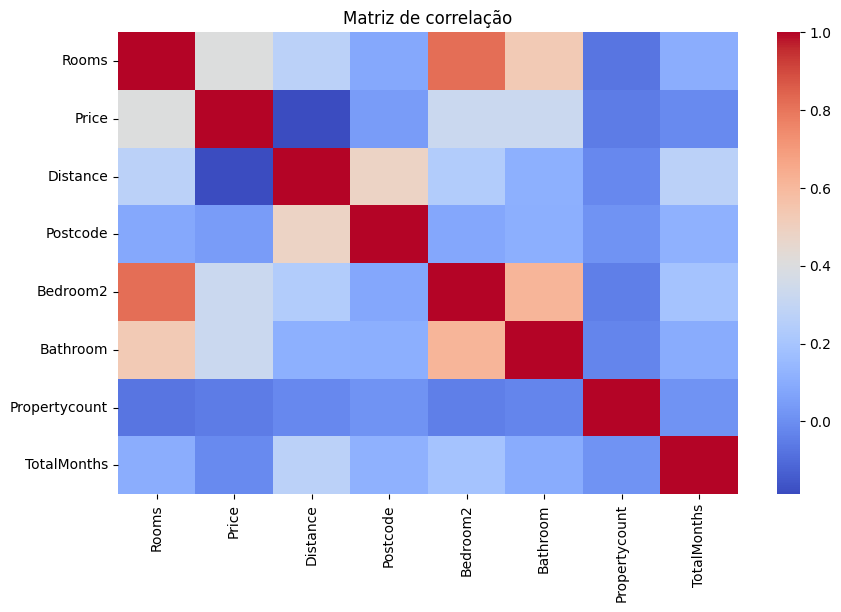

In [11]:
#Obtendo apenas os dados numericos do dataset
numeric_data = data.select_dtypes(include = ["int64", "float64"])
correlation_matrix = numeric_data.corr()
pl.figure(figsize=(10,6))
sn.heatmap(correlation_matrix, cmap = "coolwarm", annot = False)
pl.title("Matriz de correlação")
pl.show()

In [12]:
numeric_columns = data.select_dtypes(include=["float64","int64"]).columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
print(data.head())

      Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  Propertycount  \
0  0.066667  0.086835  0.051975  0.068507  0.066667  0.083333       0.182501   
1  0.066667  0.125506  0.051975  0.068507  0.066667  0.083333       0.182501   
2  0.066667  0.085470  0.051975  0.068507  0.066667  0.083333       0.182501   
3  0.133333  0.086835  0.051975  0.068507  0.100000  0.166667       0.182501   
4  0.133333  0.124157  0.051975  0.068507  0.100000  0.166667       0.182501   

   TotalMonths  
0     0.307692  
1     0.423077  
2     0.038462  
3     0.038462  
4     0.538462  


In [14]:
diseaseData = pd.read_csv("archive/heart_disease_uci.csv")
print(diseaseData.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [15]:
# 2. Remover colunas irrelevantes
colunas_irrelevantes = ['id', 'origin']
for col in colunas_irrelevantes:
    if col in diseaseData.columns:
        diseaseData.drop(col, axis=1, inplace=True)
        print(f"Coluna {col} removida")

Coluna id removida


In [16]:
# 3. Tratar valores missing
# Para colunas numéricas, preencher com a média
numeric_cols = diseaseData.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if diseaseData[col].isnull().sum() > 0:
        diseaseData[col].fillna(diseaseData[col].mean(), inplace=True)
        print(f"Valores missing de {col} preenchidos com a média")

# Para colunas categóricas, preencher com a moda
categorical_cols = diseaseData.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if diseaseData[col].isnull().sum() > 0:
        diseaseData[col].fillna(diseaseData[col].mode()[0], inplace=True)
        print(f"Valores missing de {col} preenchidos com a moda")


Valores missing de trestbps preenchidos com a média
Valores missing de chol preenchidos com a média
Valores missing de thalch preenchidos com a média
Valores missing de oldpeak preenchidos com a média
Valores missing de ca preenchidos com a média
Valores missing de fbs preenchidos com a moda
Valores missing de restecg preenchidos com a moda
Valores missing de exang preenchidos com a moda
Valores missing de slope preenchidos com a moda
Valores missing de thal preenchidos com a moda


C:\Users\joaov\AppData\Local\Temp\ipykernel_9940\3130601160.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diseaseData[col].fillna(diseaseData[col].mean(), inplace=True)
C:\Users\joaov\AppData\Local\Temp\ipykernel_9940\3130601160.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [17]:
# 4. APLICAR LABEL ENCODING (arrays) em vez de one-hot
print("\nAplicando Label Encoding nas colunas categóricas:")
le = LabelEncoder()

for col in categorical_cols:
    if col in diseaseData.columns:
        # Verificar se a coluna tem pelo menos 2 valores únicos
        if diseaseData[col].nunique() >= 2:
            diseaseData[col] = le.fit_transform(diseaseData[col])
            print(f"Coluna {col} convertida com Label Encoding")
        else:
            # Se tiver apenas 1 valor, remover (não traz informação)
            diseaseData.drop(col, axis=1, inplace=True)
            print(f"Coluna {col} removida (apenas 1 valor único)")



Aplicando Label Encoding nas colunas categóricas:
Coluna sex convertida com Label Encoding
Coluna dataset convertida com Label Encoding
Coluna cp convertida com Label Encoding
Coluna fbs convertida com Label Encoding
Coluna restecg convertida com Label Encoding
Coluna exang convertida com Label Encoding
Coluna slope convertida com Label Encoding
Coluna thal convertida com Label Encoding


In [18]:
# 5. Verificar o resultado
print(f"\nShape após pré-processamento: {diseaseData.shape}")
print("\nTipos de dados finais:\n", diseaseData.dtypes)
print("\nPrimeiras 5 linhas do dataset:")
print(diseaseData.head())



Shape após pré-processamento: (920, 15)

Tipos de dados finais:
 age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object

Primeiras 5 linhas do dataset:
   age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  

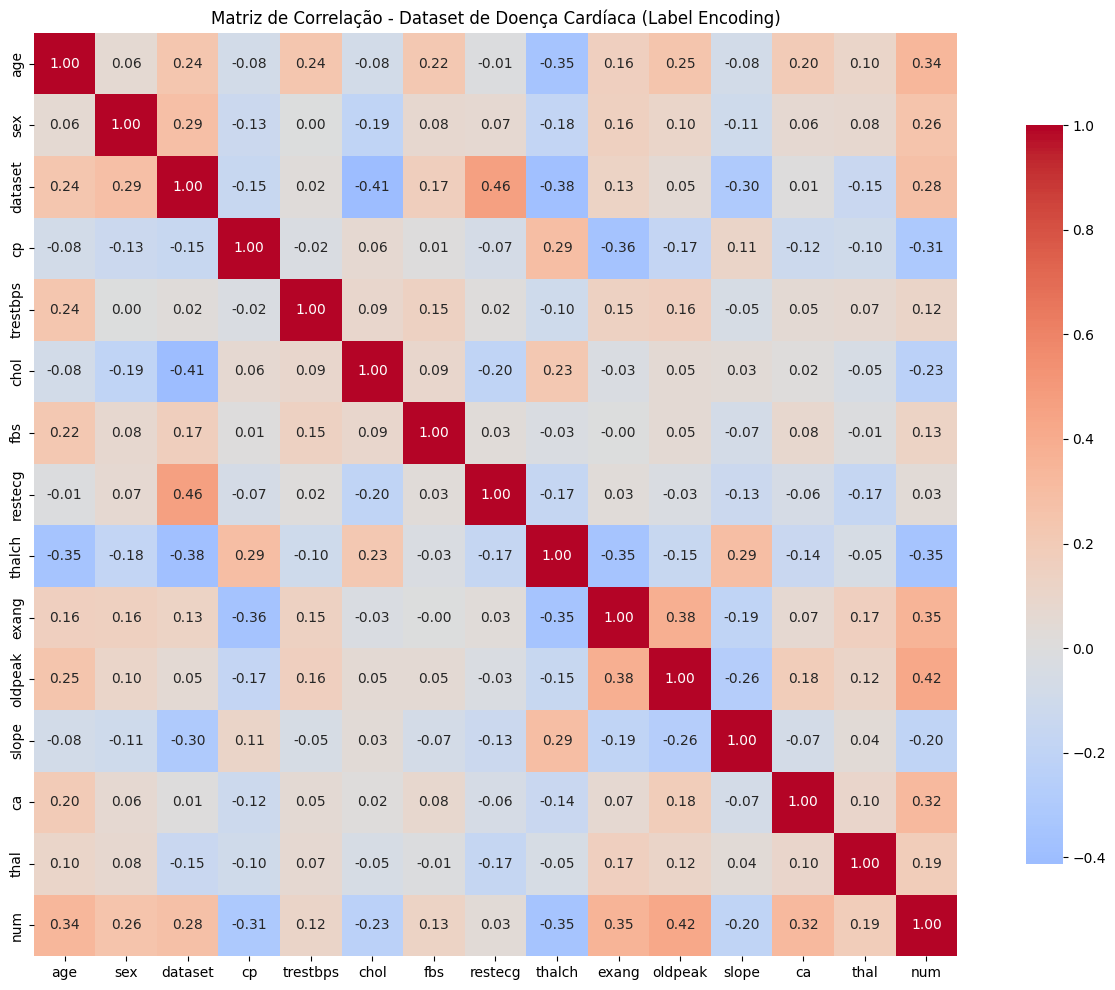

In [23]:
# 6. Gerar matriz de correlação
corr_matrix = diseaseData.corr()

# Plotar a matriz de correlação com heatmap
pl.figure(figsize=(14, 10))
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            square=True, cbar_kws={"shrink": .8})
pl.title("Matriz de Correlação - Dataset de Doença Cardíaca (Label Encoding)")
pl.tight_layout()
pl.show()



Correlações com a target (num) - Ordenadas por importância:
num         1.000000
oldpeak     0.421907
thalch      0.351055
exang       0.350567
age         0.339596
ca          0.321404
cp          0.314518
dataset     0.276203
sex         0.259342
chol        0.228238
slope       0.201875
thal        0.186387
fbs         0.129539
trestbps    0.116225
restecg     0.034603
Name: num, dtype: float64


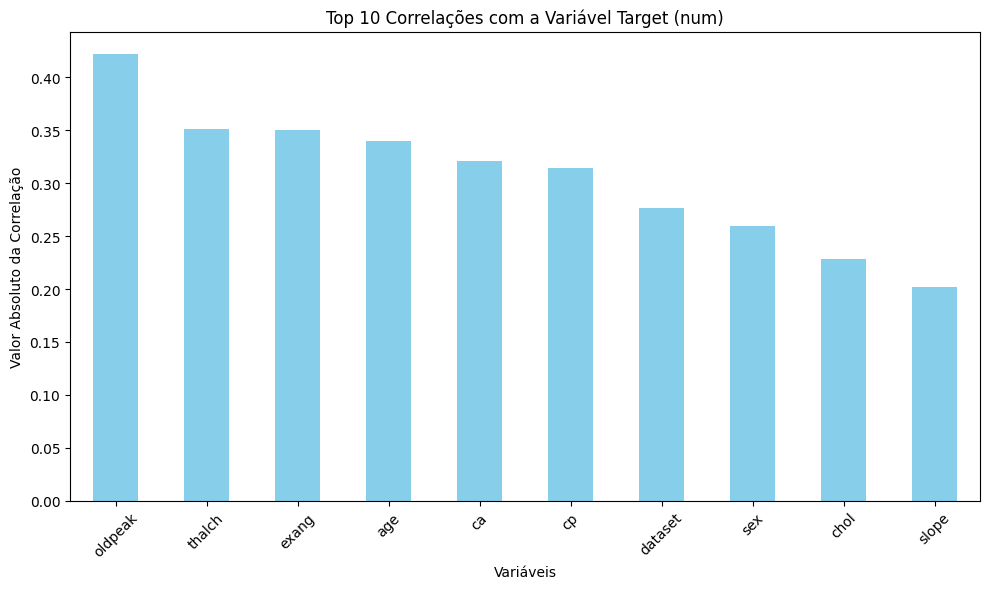


Correlações com a target (num) - Ordenadas por importância:
num         1.000000
oldpeak     0.421907
thalch      0.351055
exang       0.350567
age         0.339596
ca          0.321404
cp          0.314518
dataset     0.276203
sex         0.259342
chol        0.228238
slope       0.201875
thal        0.186387
fbs         0.129539
trestbps    0.116225
restecg     0.034603
Name: num, dtype: float64


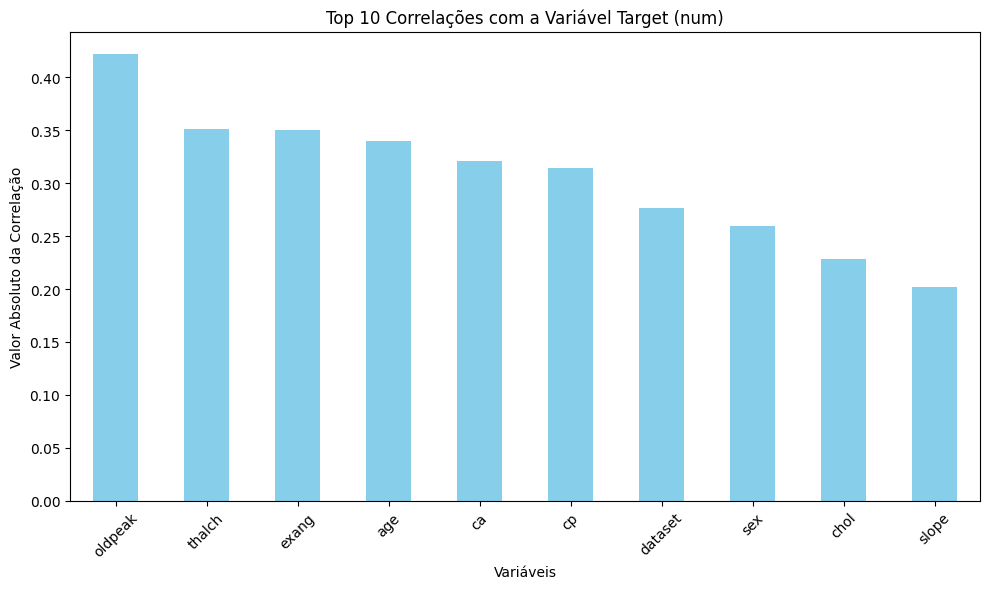

In [33]:
# 7. Mostrar correlações com a target (num)
if 'num' in diseaseData.columns:
    print("\nCorrelações com a target (num) - Ordenadas por importância:")
    correlations = corr_matrix['num'].abs().sort_values(ascending=False)
    print(correlations)
    
    # Plotar as top 10 correlações
    top_correlations = correlations.head(11)  # Pega 11 porque inclui a correlação consigo mesma
    top_correlations = top_correlations[1:]  # Remove a correlação de 'num' consigo mesma
    
    pl.figure(figsize=(10, 6))
    top_correlations.plot(kind='bar', color='skyblue')
    pl.title('Top 10 Correlações com a Variável Target (num)')
    pl.xlabel('Variáveis')
    pl.ylabel('Valor Absoluto da Correlação')
    pl.xticks(rotation=45)
    pl.tight_layout()
    pl.show()

In [38]:
#funções de medição de acurácia
from sklearn.metrics import accuracy_score

#preparando os dados para o treinamento
x = diseaseData.drop(columns=["num"])
y = diseaseData["num"]

#separando os dados de treino e teste
X_train, X_test,Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#iniciando o modelo
model = SVC(kernel='rbf', C=5.0, gamma='scale')

model.fit(X_train,Y_train)

predicaoes = model.predict(X_test)

acuracia = accuracy_score(Y_test, predicaoes)

print(acuracia)

0.5271739130434783
